In [93]:
import pickle
import numpy as np
from scipy.stats import sem

ad_results_dir = "ad_results"

test_lasso_errors = np.array(pickle.load(open("{}/test_lasso_errors.p".format(ad_results_dir), "rb")))
test_errors_no_prior = np.array(pickle.load(open("{}/test_errors_no_prior.p".format(ad_results_dir), "rb")))
test_errors_random_prior = np.array(pickle.load(open("{}/test_errors_random_prior.p".format(ad_results_dir), "rb")))
test_errors_with_prior = np.array(pickle.load(open("{}/test_errors_with_prior.p".format(ad_results_dir), "rb")))

(0.4, 1.6191705567228305)

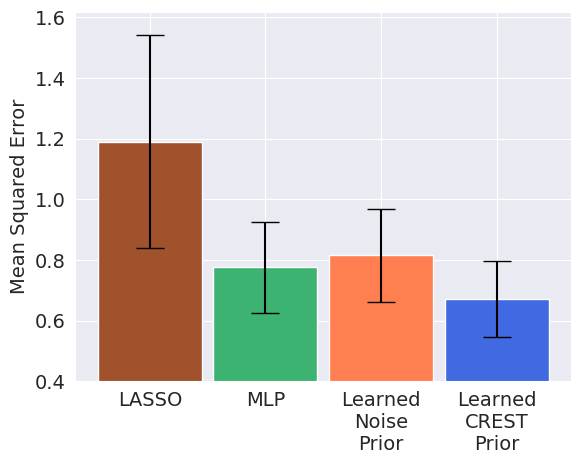

In [95]:
from scipy.stats import sem
import matplotlib as mpl

import seaborn as sns
plt.style.use('default')
sns.set_style("darkgrid")

mean_errors = [
    test_lasso_errors.mean(),
    test_errors_no_prior.mean(),
    test_errors_random_prior.mean(),
    test_errors_with_prior.mean()
]

stderr = [
    sem(test_lasso_errors),
    sem(test_errors_no_prior),
    sem(test_errors_random_prior),
    sem(test_errors_with_prior)
]

df = pd.DataFrame()

plt.bar(
    ["LASSO", "MLP", "Learned\nNoise\nPrior", "Learned\nCREST\nPrior"],
    mean_errors,
    yerr = stderr,
    align='center',
    ecolor='black',
    capsize=10,
    color=['sienna', 'mediumseagreen', 'coral', 'royalblue'],
    width=0.9
)
plt.ylabel("Mean Squared Error", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0.4)

In [110]:
print(mean_errors)

[1.1902771611487588, 0.7756466925144195, 0.8149153351783752, 0.6716785907745362]


In [111]:
stderr

[0.3517900357301274,
 0.14963254573353107,
 0.15177799996895647,
 0.12487711978883165]

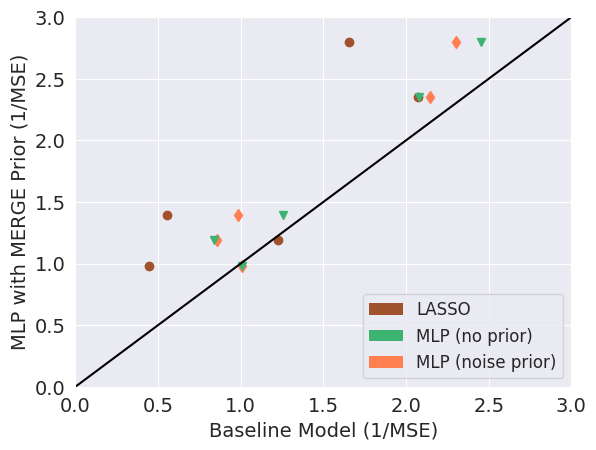

In [109]:
fig, ax = plt.subplots()
ax.plot(1/test_lasso_errors, 1/test_errors_with_prior, color='sienna', marker='o', linestyle='none')
ax.plot(1/test_errors_random_prior, 1/test_errors_with_prior, color='coral', marker='d', linestyle='none')
ax.plot(1/test_errors_no_prior, 1/test_errors_with_prior, color='mediumseagreen', marker='v', linestyle='none')
plt.ylim(0, 3)
plt.xlim(0, 3)

plt.xlabel("Baseline Model (1/MSE)", fontsize=14)
plt.ylabel("MLP with MERGE Prior (1/MSE)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, color="k")

lasso_bar = plt.Rectangle((0,0),1,1,fc="sienna", edgecolor = 'none')
mlp_bar = plt.Rectangle((0,0),1,1,fc="mediumseagreen", edgecolor = 'none')
random_prior_bar = plt.Rectangle((0,0),1,1,fc="coral", edgecolor = 'none')

plt.legend(
    [lasso_bar, mlp_bar, random_prior_bar],
    ["LASSO", 'MLP (no prior)', "MLP (noise prior)"],
    ncol = 1,
    prop={'size':12},
    loc="lower right"
)

In [3]:
# Code to generate hubness feature
"""
df = pd.read_csv("./brain_top", sep="\t")
df.columns = ["Gene 1", "Gene 2", "Posterior Prob."]

from tqdm import tqdm_notebook

tqdm.pandas()
df_summed = df.drop("Gene 2", axis=1).groupby("Gene 1").sum().reset_index()

import mygene
mg = mygene.MyGeneInfo()

def entrez_to_symbol(entrez_id):
    gene_info = mg.getgene(entrez_id)
    return gene_info['symbol'] if gene_info else None

df_summed["Gene 1"] = df_summed["Gene 1"].progress_map(lambda x: entrez_to_symbol(x))
"""

'\ndf = pd.read_csv("./brain_top", sep="\t")\ndf.columns = ["Gene 1", "Gene 2", "Posterior Prob."]\n\nfrom tqdm import tqdm_notebook\n\ntqdm.pandas()\ndf_summed = df.drop("Gene 2", axis=1).groupby("Gene 1").sum().reset_index()\n\nimport mygene\nmg = mygene.MyGeneInfo()\n\ndef entrez_to_symbol(entrez_id):\n    gene_info = mg.getgene(entrez_id)\n    return gene_info[\'symbol\'] if gene_info else None\n\ndf_summed["Gene 1"] = df_summed["Gene 1"].progress_map(lambda x: entrez_to_symbol(x))\n'

In [4]:
"""
import GEOparse
gse = GEOparse.get_GEO(geo="GSE80970", destdir="./")
methylation_illumina = pd.read_csv("HumanMethylation450_15017482_v1-2.csv")
methylation_illumina = methylation_illumina[["IlmnID", "UCSC_RefGene_Name"]]
methylation_illumina = methylation_illumina.dropna()
methylation_illumina = methylation_illumina.set_index("IlmnID")
methylation_values = None
methylation_regions = None
for gsm_name, gsm in gse.gsms.items():
    if methylation_values is not None:
        methylation_values += gsm.table["VALUE"]
    else:
        methylation_values = gsm.table["VALUE"]
        methylation_regions = gsm.table["ID_REF"]
methylation_values /= len(gse.gsms.items())

methylation_df = pd.DataFrame(data={
    "ID_REF": methylation_regions,
    "Methylation": methylation_values
}).set_index("ID_REF")
methylation_df = methylation_df.loc[methylation_illumina.index]
methylation_df["UCSC_RefGene_Name"] = methylation_illumina["UCSC_RefGene_Name"].map(lambda x: x.split(";")[0])
methylation_df = methylation_df.dropna()
methylation_df = methylation_df.groupby("UCSC_RefGene_Name").mean()
methylation_df = methylation_df.T
"""

'\nimport GEOparse\ngse = GEOparse.get_GEO(geo="GSE80970", destdir="./")\nmethylation_illumina = pd.read_csv("HumanMethylation450_15017482_v1-2.csv")\nmethylation_illumina = methylation_illumina[["IlmnID", "UCSC_RefGene_Name"]]\nmethylation_illumina = methylation_illumina.dropna()\nmethylation_illumina = methylation_illumina.set_index("IlmnID")\nmethylation_values = None\nmethylation_regions = None\nfor gsm_name, gsm in gse.gsms.items():\n    if methylation_values is not None:\n        methylation_values += gsm.table["VALUE"]\n    else:\n        methylation_values = gsm.table["VALUE"]\n        methylation_regions = gsm.table["ID_REF"]\nmethylation_values /= len(gse.gsms.items())\n\nmethylation_df = pd.DataFrame(data={\n    "ID_REF": methylation_regions,\n    "Methylation": methylation_values\n}).set_index("ID_REF")\nmethylation_df = methylation_df.loc[methylation_illumina.index]\nmethylation_df["UCSC_RefGene_Name"] = methylation_illumina["UCSC_RefGene_Name"].map(lambda x: x.split(";")[

In [5]:
"""
ad_hubness = pickle.load(open("ad_hubness.p", "rb"))
ad_hubness.dropna(inplace=True)
ad_hubness = ad_hubness.groupby("Gene 1").mean()
ad_hubness = ad_hubness.rename(columns={"Posterior Prob.": "Hubness"})
ad_hubness = ad_hubness.T
"""

'\nad_hubness = pickle.load(open("ad_hubness.p", "rb"))\nad_hubness.dropna(inplace=True)\nad_hubness = ad_hubness.groupby("Gene 1").mean()\nad_hubness = ad_hubness.rename(columns={"Posterior Prob.": "Hubness"})\nad_hubness = ad_hubness.T\n'

In [6]:
#from data import MergeData
#merge_data = MergeData.load_data()

In [7]:
#regulator = pd.DataFrame(merge_data.data.T["Regulator"]).T

In [8]:
#cnv = pd.DataFrame(merge_data.data.T["Genomic abnormalities (CNV)"]).T

In [9]:
#overlapping_genes = set(methylation_df.columns).intersection(ad_hubness.columns).intersection(cnv.columns).intersection(regulator.columns)

In [10]:
#ad_hubness = ad_hubness[overlapping_genes]
#methylation_df = methylation_df[overlapping_genes]
#cnv = cnv[overlapping_genes]
#

# pre-process abeta data

In [37]:
import egexplainer
import importlib

importlib.reload(egexplainer)

APExp = egexplainer.VariableBatchExplainer(train_dataset)

In [40]:
from data import BasicDataset

prior_data = BasicDataset(X = prior_info, y = np.zeros(prior_info.shape[0]))

meta_APExp = egexplainer.VariableBatchExplainer(prior_data)

In [41]:
for X_batch, y_batch in test_loader:
    y_batch = y_batch.squeeze()
    X_batch = X_batch.float().cuda()
    y_batch = y_batch.float().cuda()
    predicted_attributions = f2(prior_info).abs().squeeze().cpu().detach().numpy()
    meta_eg = meta_APExp.shap_values(f2, prior_info).abs().cpu().detach().numpy()

In [42]:
meta_eg = np.abs(meta_eg)
row_sums = meta_eg.sum(axis=1)
meta_eg = meta_eg / row_sums[:, np.newaxis]
meta_eg = (meta_eg.T * predicted_attributions).T

/homes/gws/ewein/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
df = pd.DataFrame(data={
    "Connectivity": meta_eg[:,0],
    "Methylation": meta_eg[:,1],
    "CNV": meta_eg[:,2],
    "Regulator": meta_eg[:,3],
    "total_attribution": predicted_attributions
},
index=overlapping_genes)

In [86]:
num_bars = 10
data_to_plot = df.dropna().nlargest(num_bars, "total_attribution")

data_to_plot = data_to_plot.sort_values(by="total_attribution", ascending=True)
data_to_plot.drop("total_attribution", axis=1, inplace=True)

import seaborn as sns
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (24, 10)})

colors = {
    "connectivity": "#0000A3",
    "methylation": "#8A2BE2",
    "regulator": "#008000",
    "cnv": "#00CED1"
}

connectivity_bar = plt.Rectangle((0,0),1,1,fc=colors["connectivity"],  edgecolor = 'none')
methylation_bar = plt.Rectangle((0,0),1,1,fc=colors["methylation"],edgecolor = 'none')
regulator_bar = plt.Rectangle((0,0),1,1,fc=colors["regulator"],  edgecolor = 'none')
cnv_bar = plt.Rectangle((0,0),1,1,fc=colors["cnv"], edgecolor = 'none')

data_to_plot.plot(
    kind="barh",
    stacked=True,
    color=[
        colors["connectivity"],
        colors["methylation"],
        colors["regulator"],
        colors["cnv"]
    ],
    figsize=(48,24),
    width=0.8,
    legend=None
)

plt.xticks(fontsize=36)
plt.yticks(fontsize=36)
plt.ylabel("")

plt.legend(
    [connectivity_bar, regulator_bar, cnv_bar, methylation_bar],
    ['Connectivity', "Regulator", "CNV", "Methylation"],
    ncol = 1,
    prop={'size':24}
)

plt.xlabel("Predicted Gene Importance", fontsize=36)

fig = plt.gcf()
fig.set_size_inches(15.5, 10.5)
plt.tight_layout()

KeyError: 'total_attribution'

In [45]:
from utils import metafeature_pdp

In [46]:
cram_features = pd.read_csv("./cram.csv")
cram_features = cram_features.set_index("Unnamed: 0")
overlapping_genes = list(set(X.columns).intersection(cram_features.columns))
cram_features = cram_features[overlapping_genes]
cram_features = cram_features.T

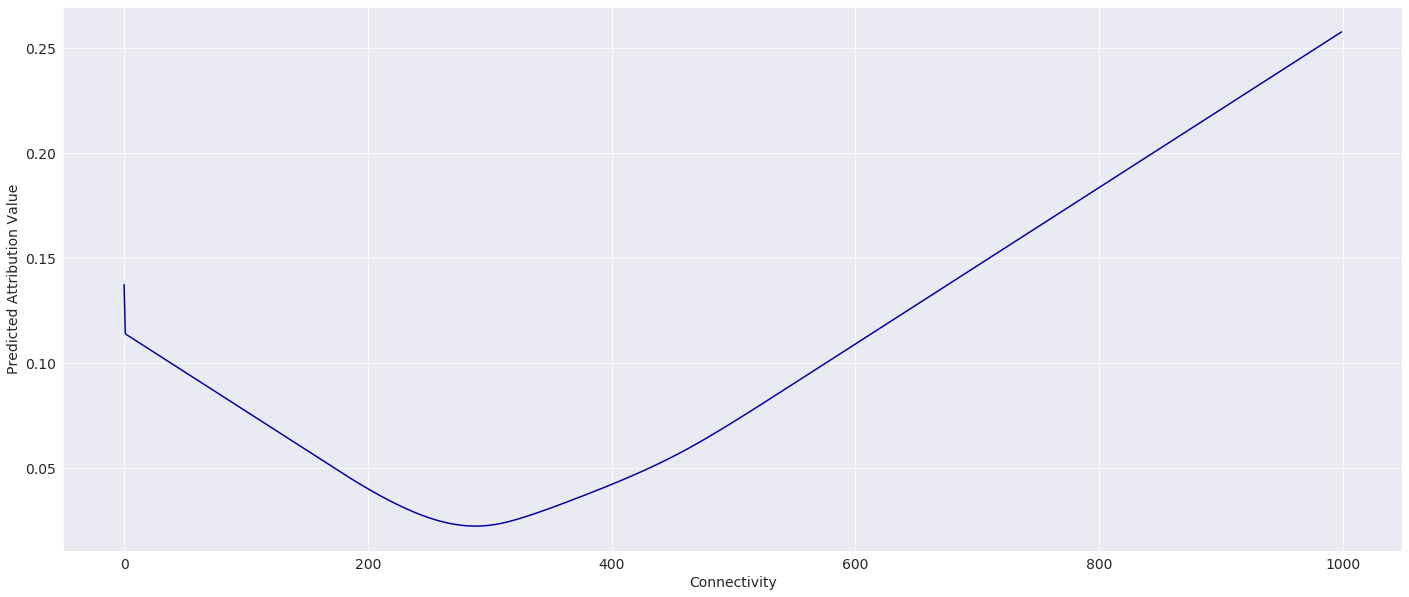

In [49]:
metafeature_pdp(
    metafeatures=cram_features,
    feature_to_alter="Connectivity",
    meta_range=np.arange(0, 1000, 1),
    color=colors["connectivity"],
    model=f2,
    xlabel="Connectivity",
    ylabel="Predicted Attribution Value"
    
)